In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import researchpy, numpy, pandas
import scipy.stats
from scipy import stats
import math
import statistics
import researchpy as rp
import scipy.stats as stats


In [4]:
#De data binnenhalen
train = pd.read_csv('Airlinesatisfaction.csv')

In [5]:
#Random steekproef van 100
import random

# Get a random sample of size 30 from the data
random_subset = train.sample(n=30, random_state=42)


In [6]:
# Drop unnecessary columns
columns_to_drop = ['Unnamed: 0','id']
random_subset = random_subset.drop(columns=columns_to_drop)

In [7]:
#Check de data even; zorg dat je geen missing values hebt (zit alleen bij Arrival Delay)
random_subset.dropna(subset=['Arrival Delay in Minutes'])

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
80638,Female,Loyal Customer,26,Personal Travel,Eco,861,2,4,2,5,...,5,5,4,4,3,5,5,0,0.0,neutral or dissatisfied
43398,Male,Loyal Customer,22,Business travel,Business,393,3,5,5,5,...,3,1,1,3,2,3,3,0,16.0,neutral or dissatisfied
32751,Female,Loyal Customer,59,Personal Travel,Eco,196,1,3,1,3,...,4,4,1,4,3,4,4,37,34.0,neutral or dissatisfied
33571,Female,Loyal Customer,32,Personal Travel,Eco,1020,2,3,2,4,...,4,3,2,4,1,4,4,27,4.0,neutral or dissatisfied
71287,Male,disloyal Customer,35,Business travel,Business,1117,2,2,2,1,...,2,2,2,3,2,2,2,0,0.0,neutral or dissatisfied
36275,Female,Loyal Customer,25,Personal Travel,Eco,1199,2,4,2,4,...,2,1,3,4,5,2,2,1,1.0,neutral or dissatisfied
44364,Male,Loyal Customer,34,Personal Travel,Eco,925,3,4,3,1,...,3,4,5,4,4,5,3,1,0.0,neutral or dissatisfied
20292,Male,disloyal Customer,39,Business travel,Eco,546,3,2,3,2,...,4,1,1,2,2,3,4,22,42.0,neutral or dissatisfied
65495,Female,Loyal Customer,45,Personal Travel,Eco,1024,2,4,2,2,...,5,5,2,2,5,5,3,0,0.0,neutral or dissatisfied
2787,Female,Loyal Customer,31,Business travel,Business,1813,2,4,4,4,...,2,3,1,4,1,4,2,0,3.0,neutral or dissatisfied


In [8]:
#Vervang codering voor cijfers
random_subset['Gender'].replace({'Female': 0, 'Male': 1},inplace = True)
random_subset['Customer Type'].replace({'disloyal Customer': 0, 'Loyal Customer': 1},inplace = True)
random_subset['Type of Travel'].replace({'Personal Travel': 0, 'Business travel': 1},inplace = True)
random_subset['Class'].replace({'Eco': 1, 'Eco Plus': 2, 'Business': 3},inplace = True)


random_subset

C:\Users\joeyw\AppData\Local\Temp\ipykernel_3796\715464817.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  random_subset['Gender'].replace({'Female': 0, 'Male': 1},inplace = True)
C:\Users\joeyw\AppData\Local\Temp\ipykernel_3796\715464817.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  rando

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
80638,0,1,26,0,1,861,2,4,2,5,...,5,5,4,4,3,5,5,0,0.0,neutral or dissatisfied
43398,1,1,22,1,3,393,3,5,5,5,...,3,1,1,3,2,3,3,0,16.0,neutral or dissatisfied
32751,0,1,59,0,1,196,1,3,1,3,...,4,4,1,4,3,4,4,37,34.0,neutral or dissatisfied
33571,0,1,32,0,1,1020,2,3,2,4,...,4,3,2,4,1,4,4,27,4.0,neutral or dissatisfied
71287,1,0,35,1,3,1117,2,2,2,1,...,2,2,2,3,2,2,2,0,0.0,neutral or dissatisfied
36275,0,1,25,0,1,1199,2,4,2,4,...,2,1,3,4,5,2,2,1,1.0,neutral or dissatisfied
44364,1,1,34,0,1,925,3,4,3,1,...,3,4,5,4,4,5,3,1,0.0,neutral or dissatisfied
20292,1,0,39,1,1,546,3,2,3,2,...,4,1,1,2,2,3,4,22,42.0,neutral or dissatisfied
65495,0,1,45,0,1,1024,2,4,2,2,...,5,5,2,2,5,5,3,0,0.0,neutral or dissatisfied
2787,0,1,31,1,3,1813,2,4,4,4,...,2,3,1,4,1,4,2,0,3.0,neutral or dissatisfied


In [9]:
#Eens kijken wat we in de dataset hebben; de variabelen met gemiddelde en de standaardafwijking
averages = random_subset[['Age', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']].mean()
standarDeviations = random_subset[['Age', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']].std()
print("Averges: ") 
print(averages)
print("Standard Deviations: ")
print(standarDeviations)

Averges: 
Age                                   33.800000
Class                                  2.000000
Flight Distance                      998.533333
Inflight wifi service                  2.400000
Departure/Arrival time convenient      3.066667
Ease of Online booking                 2.566667
Inflight entertainment                 3.500000
On-board service                       3.100000
Leg room service                       2.900000
Baggage handling                       3.600000
Checkin service                        3.200000
Inflight service                       3.733333
Cleanliness                            3.500000
Departure Delay in Minutes            18.266667
Arrival Delay in Minutes              17.933333
dtype: float64
Standard Deviations: 
Age                                   12.515921
Class                                  1.017095
Flight Distance                      811.799480
Inflight wifi service                  1.404426
Departure/Arrival time convenient      1.

In [10]:
#We gaan het een en ander doen met satisfaction; verstandig om te coderen naar cijfers
random_subset['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)

C:\Users\joeyw\AppData\Local\Temp\ipykernel_3796\1258784526.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  random_subset['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)
C:\Users\joeyw\AppData\Local\Temp\ipykernel_3796\1258784526.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silen

In [11]:
#Wat is hier van de bedoeling???
#random_subset['...'].()

In [12]:
#Wat is hier van de bedoeling???
#random_subset[''].()

In [13]:
#Mooiere output
descriptive_stats = rp.summary_cont(random_subset['Age'])

print(descriptive_stats)




  Variable     N  Mean       SD      SE  95% Conf.  Interval
0      Age  30.0  33.8  12.5159  2.2851    29.1265   38.4735


c:\Users\joeyw\AppData\Local\Programs\Python\Python311\Lib\site-packages\researchpy\summary.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Age' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = group1.name


In [14]:
#Bekend is dat een aantal libraries niet werken met spaties in de variabele namen. Deze eerst maar omzetten
# Replace spaces in the column names with underscore
random_subset.columns = [c.replace(' ', '_') for c in random_subset.columns]


In [15]:
rp.summary_cont(random_subset['Flight_Distance'])

c:\Users\joeyw\AppData\Local\Programs\Python\Python311\Lib\site-packages\researchpy\summary.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Flight_Distance' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = group1.name


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Flight_Distance,30.0,998.5333,811.7995,148.2136,695.4024,1301.6642


C:\Users\joeyw\AppData\Local\Temp\ipykernel_3796\2941144232.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, bins=15)


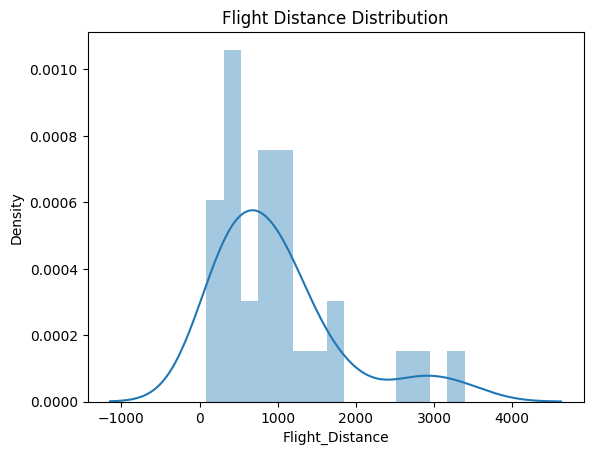

In [16]:
#Visuele checks van de verdelingen
# Extracting the 'Flight Distance' column from the DataFrame
x = random_subset['Flight_Distance']

# Creating a distribution plot using seaborn
sns.distplot(x, bins=15)

# Adding title to the plot
plt.title('Flight Distance Distribution')

# Displaying the plot
plt.show()


C:\Users\joeyw\AppData\Local\Temp\ipykernel_3796\4071823577.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, bins = 5)


Text(0.5, 1.0, '/Age')

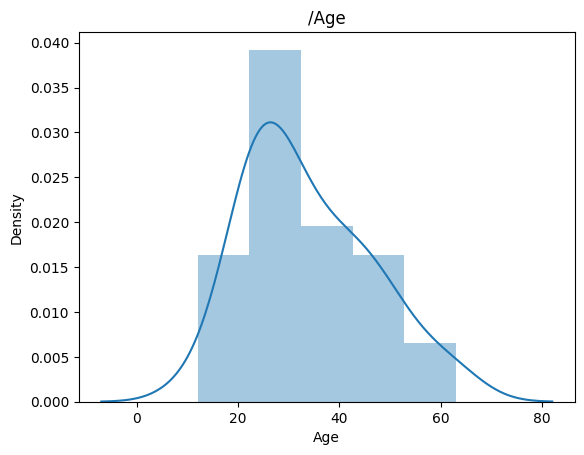

In [17]:
x = random_subset['Age']
sns.distplot(x, bins = 5)
plt.title('/Age')


C:\Users\joeyw\AppData\Local\Temp\ipykernel_3796\2432483861.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, bins = 15)


Text(0.5, 1.0, 'Departure Delay in Minutes')

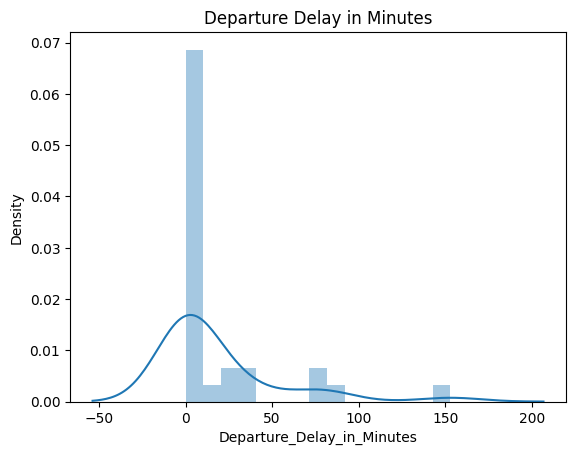

In [18]:
x = random_subset['Departure_Delay_in_Minutes']
sns.distplot(x, bins = 15)
plt.title('Departure Delay in Minutes')

C:\Users\joeyw\AppData\Local\Temp\ipykernel_3796\403260203.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, bins = 15)


Text(0.5, 1.0, 'Arrival Delay in Minutes')

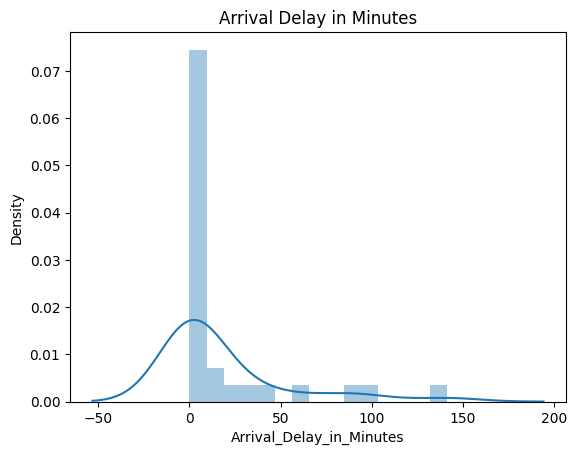

In [19]:
x = random_subset['Arrival_Delay_in_Minutes']
sns.distplot(x, bins = 15)
plt.title('Arrival Delay in Minutes')

In [20]:
#We willen een toets doen om te bepalen of de data normaal verdeeld is
#Dan moeten we de betrefffende variabele eerst sorteren van laag naar hoog
#Dat blijkt evenwel slechts bij sommige librairies met KS nodig te zijn
#Hierbij toch de code, voor het geval je een andere library gebruikt
#waarbij het wel nodig is
random_subset.sort_values(
    ['Age'],
    ascending=True,
    inplace=True)

In [21]:
#Vervolgens moeten we de data normaliseren (dus omzetten in z -scores)
#Ik maak daar een nieuwe dataset van (df_z)
from sklearn.preprocessing import StandardScaler
#En ik zet eerst alle scores om in cijfers
# random_subset[''].replace({}, inplace = True)
# random_subset[''].replace({'': 0, '': 1}, inplace = True)
# random_subset[''].replace(inplace = True)
# random_subset[''].replace()


In [22]:
#Eindelijk is het zover
print(random_subset[0:5])
scaler = StandardScaler()
df_z = pd.DataFrame(scaler.fit_transform(random_subset), columns = random_subset.columns)
print(df_z[0:5])

        Gender  Customer_Type  Age  Type_of_Travel  Class  Flight_Distance  \
101497       0              1   12               0      1             1721   
75710        1              0   20               1      3              333   
58924        0              1   21               1      3             2682   
43398        1              1   22               1      3              393   
84656        0              0   22               1      3              304   

        Inflight_wifi_service  Departure/Arrival_time_convenient  \
101497                      1                                  5   
75710                       0                                  0   
58924                       2                                  2   
43398                       3                                  5   
84656                       5                                  4   

        Ease_of_Online_booking  Gate_location  ...  Inflight_entertainment  \
101497                       1              

In [23]:
#Dan een test. Er zijn vele mogelijkheden; we kiezen voor de Kolmogorov Smirnov Test
#Deze voer ik dus uit op de gestandaardiseerde dataset
stats.kstest(df_z['Age'], stats.norm.cdf)


KstestResult(statistic=0.13691393974552202, pvalue=0.5801014312611923, statistic_location=-0.6338601097442678, statistic_sign=1)

In [24]:
stats.kstest(df_z['Flight_Distance'], stats.norm.cdf)


KstestResult(statistic=0.2076700866110186, pvalue=0.13000069317649854, statistic_location=0.1484256735705443, statistic_sign=1)

In [25]:
stats.kstest(df_z['Departure_Delay_in_Minutes'], stats.norm.cdf)

KstestResult(statistic=0.323661132340322, pvalue=0.002685183661366497, statistic_location=-0.4967797141550238, statistic_sign=1)

In [26]:
stats.kstest(df_z['Arrival_Delay_in_Minutes'], stats.norm.cdf)

KstestResult(statistic=0.32423847051063703, pvalue=0.0026219743255695427, statistic_location=-0.4058451357001476, statistic_sign=1)

In [27]:
random_subset.transpose()

,101497,75710,58924,43398,84656,71742,9281,80740,42729,17078,...,34023,58947,75370,65495,41962,71140,81389,70828,32751,11081
Gender,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
Customer_Type,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Age,12.0,20.0,21.0,22.0,22.0,23.0,23.0,24.0,25.0,25.0,...,40.0,41.0,42.0,45.0,45.0,50.0,50.0,51.0,59.0,63.0
Type_of_Travel,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
Class,1.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,3.0,3.0,...,3.0,1.0,3.0,1.0,1.0,3.0,3.0,1.0,1.0,3.0
Flight_Distance,1721.0,333.0,2682.0,393.0,304.0,89.0,488.0,402.0,2922.0,581.0,...,235.0,331.0,507.0,1024.0,479.0,3391.0,936.0,1089.0,196.0,1482.0
Inflight_wifi_service,1.0,0.0,2.0,3.0,5.0,5.0,2.0,0.0,1.0,2.0,...,3.0,4.0,2.0,2.0,3.0,1.0,2.0,2.0,1.0,4.0
Departure/Arrival_time_convenient,5.0,0.0,2.0,5.0,4.0,0.0,5.0,3.0,1.0,5.0,...,3.0,4.0,2.0,4.0,1.0,3.0,2.0,5.0,3.0,1.0
Ease_of_Online_booking,1.0,0.0,2.0,5.0,4.0,5.0,2.0,0.0,1.0,5.0,...,3.0,4.0,2.0,2.0,1.0,1.0,2.0,5.0,1.0,2.0
Gate_location,4.0,4.0,2.0,5.0,1.0,4.0,4.0,3.0,1.0,5.0,...,3.0,4.0,2.0,2.0,1.0,1.0,2.0,5.0,3.0,1.0


<Axes: xlabel='Age', ylabel='Count'>

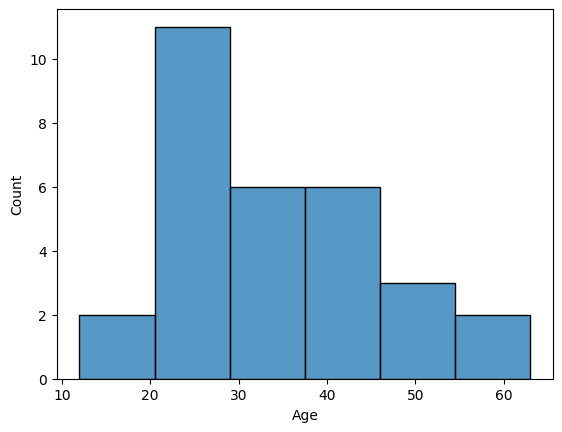

In [28]:
sns.histplot(x=random_subset['Age'])

<Axes: xlabel='Flight_Distance', ylabel='Count'>

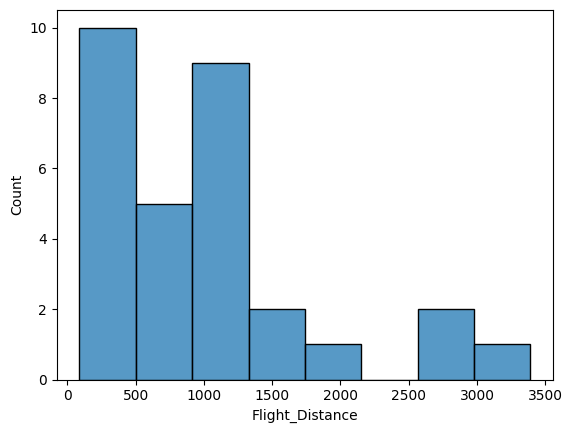

In [29]:
sns.histplot(x=random_subset['Flight_Distance'])

<Axes: xlabel='Departure_Delay_in_Minutes', ylabel='Count'>

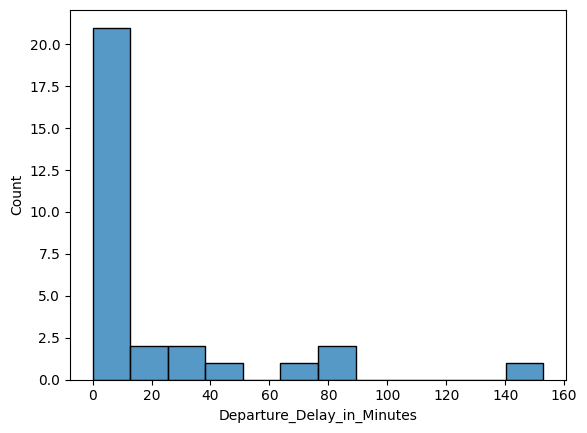

In [30]:
sns.histplot(x=random_subset['Departure_Delay_in_Minutes'])

<Axes: xlabel='Arrival_Delay_in_Minutes', ylabel='Count'>

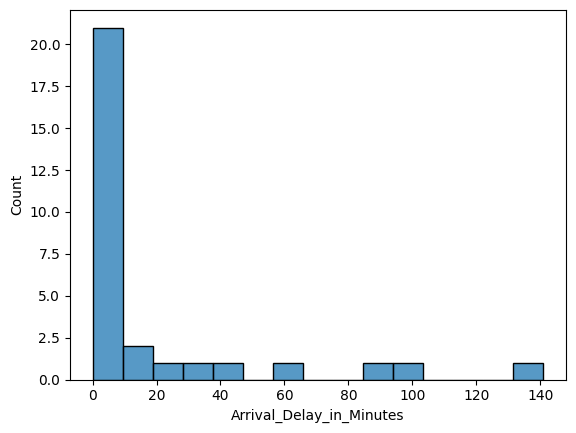

In [31]:
sns.histplot(x=random_subset['Arrival_Delay_in_Minutes'])

In [32]:
# Maak eerst een opsplitsing in de data tussen tevreden en ontevreden passagiers
tevreden = random_subset.loc[random_subset['satisfaction'] == 1]
ontevreden = random_subset.loc[random_subset['satisfaction'] == 0]

In [33]:
#Bekend is dat een aantal libraries niet werken met spaties in de variabele namen. Deze eerst maar omzetten
# Replace spaces in the column names with underscore
random_subset.columns = [c.replace(' ', '_') for c in random_subset.columns]

In [34]:
random_subset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gender,30.0,0.433333,0.504007,0.0,0.00,0.0,1.00,1.0
Customer_Type,30.0,0.766667,0.430183,0.0,1.00,1.0,1.00,1.0
Age,30.0,33.800000,12.515921,12.0,24.25,31.0,41.75,63.0
Type_of_Travel,30.0,0.700000,0.466092,0.0,0.00,1.0,1.00,1.0
Class,30.0,2.000000,1.017095,1.0,1.00,2.0,3.00,3.0
Flight_Distance,30.0,998.533333,811.799480,89.0,421.25,893.0,1117.00,3391.0
Inflight_wifi_service,30.0,2.400000,1.404426,0.0,2.00,2.0,3.00,5.0
Departure/Arrival_time_convenient,30.0,3.066667,1.595972,0.0,2.00,3.0,4.00,5.0
Ease_of_Online_booking,30.0,2.566667,1.590561,0.0,1.25,2.0,4.00,5.0
Gate_location,30.0,3.066667,1.507071,1.0,2.00,3.5,4.00,5.0


In [35]:
random_subset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gender,30.0,0.433333,0.504007,0.0,0.00,0.0,1.00,1.0
Customer_Type,30.0,0.766667,0.430183,0.0,1.00,1.0,1.00,1.0
Age,30.0,33.800000,12.515921,12.0,24.25,31.0,41.75,63.0
Type_of_Travel,30.0,0.700000,0.466092,0.0,0.00,1.0,1.00,1.0
Class,30.0,2.000000,1.017095,1.0,1.00,2.0,3.00,3.0
Flight_Distance,30.0,998.533333,811.799480,89.0,421.25,893.0,1117.00,3391.0
Inflight_wifi_service,30.0,2.400000,1.404426,0.0,2.00,2.0,3.00,5.0
Departure/Arrival_time_convenient,30.0,3.066667,1.595972,0.0,2.00,3.0,4.00,5.0
Ease_of_Online_booking,30.0,2.566667,1.590561,0.0,1.25,2.0,4.00,5.0
Gate_location,30.0,3.066667,1.507071,1.0,2.00,3.5,4.00,5.0


In [36]:
#Correlaties berekenen. Een gemakkelijke waarbij we alle relevante variabelen in een tabel krijgen
random_subset.corr()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
Gender,1.000000,-0.312783,0.041545,0.425689,3.363364e-01,-0.168467,0.379980,-0.551577,0.156286,-0.220934,...,0.195519,-0.302960,-0.137032,-1.738806e-01,0.068441,-0.094331,0.139656,0.016515,0.052641,0.185520
Customer_Type,-0.312783,1.000000,0.215192,-0.361158,-7.881104e-02,0.391385,-0.068491,0.375016,0.048716,0.184386,...,0.229072,0.264805,0.196226,-5.820581e-02,-0.091642,0.225844,0.229072,-0.036582,-0.019436,-0.312783
Age,0.041545,0.215192,1.000000,0.107582,-1.083522e-02,0.016474,0.059637,-0.182296,-0.073790,-0.383175,...,0.233952,0.107670,-0.072758,-3.235945e-01,-0.385458,-0.160039,0.141721,-0.069471,-0.022124,-0.122448
Type_of_Travel,0.425689,-0.361158,0.107582,1.000000,6.546537e-01,0.056212,0.294998,-0.435746,0.330247,-0.166907,...,-0.090610,-0.369206,-0.104274,-1.745950e-01,-0.010573,-0.159660,0.030203,0.185002,0.242382,0.572478
Class,0.336336,-0.078811,-0.010835,0.654654,1.000000e+00,0.306707,0.144841,-0.254916,0.191837,-0.179969,...,0.027682,-0.023830,-0.025150,-6.832950e-18,0.145350,-0.121942,0.193773,0.189889,0.225254,0.470871
Flight_Distance,-0.168467,0.391385,0.016474,0.056212,3.067074e-01,1.000000,-0.283499,-0.066646,-0.244892,-0.316971,...,0.088232,0.178014,0.195191,3.076073e-01,0.051986,0.313248,0.127665,0.196791,0.182551,0.093133
Inflight_wifi_service,0.379980,-0.068491,0.059637,0.294998,1.448414e-01,-0.283499,1.000000,-0.073845,0.744046,0.052134,...,0.260616,-0.210544,-0.251348,-2.496024e-01,0.063158,0.026493,0.280663,0.046395,0.080721,0.185119
Departure/Arrival_time_convenient,-0.551577,0.375016,-0.182296,-0.435746,-2.549156e-01,-0.066646,-0.073845,1.000000,0.269868,0.428183,...,-0.141131,0.133641,-0.028850,-1.608119e-01,-0.175997,-0.106207,-0.282261,-0.362757,-0.302490,-0.422971
Ease_of_Online_booking,0.156286,0.048716,-0.073790,0.330247,1.918371e-01,-0.244892,0.744046,0.269868,1.000000,0.444025,...,0.008851,-0.269715,-0.310386,-3.187824e-01,0.009295,-0.067580,-0.026552,0.019297,0.082037,0.027243
Gate_location,-0.220934,0.184386,-0.383175,-0.166907,-1.799685e-01,-0.316971,0.052134,0.428183,0.444025,1.000000,...,-0.074728,-0.147957,-0.132390,-1.079939e-01,-0.022889,-0.091898,-0.112092,-0.069599,-0.081820,-0.130139


In [37]:
#Correlatie berekenen
stats.pearsonr(random_subset['Age'],random_subset['Departure_Delay_in_Minutes'])

PearsonRResult(statistic=-0.06947131859721375, pvalue=0.7152735131800921)

In [38]:
#Tijd voor meer overzicht
import pingouin as pg

In [39]:
#Correlatie tussen alle variabelen in een tabel
random_subset.iloc[:, 0:25].rcorr()

c:\Users\joeyw\AppData\Local\Programs\Python\Python311\Lib\site-packages\pingouin\correlation.py:1116: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mat_upper = mat_upper.applymap(replace_pval)


,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
Gender,-,,,*,,,*,**,,,...,,,,,,,,,,
Customer_Type,-0.313,-,,*,,*,,*,,,...,,,,,,,,,,
Age,0.042,0.215,-,,,,,,,*,...,,,,,*,,,,,
Type_of_Travel,0.426,-0.361,0.108,-,***,,,*,,,...,,*,,,,,,,,***
Class,0.336,-0.079,-0.011,0.655,-,,,,,,...,,,,,,,,,,**
Flight_Distance,-0.168,0.391,0.016,0.056,0.307,-,,,,,...,,,,,,,,,,
Inflight_wifi_service,0.38,-0.068,0.06,0.295,0.145,-0.283,-,,***,,...,,,,,,,,,,
Departure/Arrival_time_convenient,-0.552,0.375,-0.182,-0.436,-0.255,-0.067,-0.074,-,,*,...,,,,,,,,*,,*
Ease_of_Online_booking,0.156,0.049,-0.074,0.33,0.192,-0.245,0.744,0.27,-,*,...,,,,,,,,,,
Gate_location,-0.221,0.184,-0.383,-0.167,-0.18,-0.317,0.052,0.428,0.444,-,...,,,,,,,,,,


In [40]:
#Beperking van aantal variabelen met nu ook de p waardes in de tabel
#Bepaal het significantie niveau (p waardes)
#Onder de diagonaal de r waardes; boven de diagonaal de p waardes
random_subset.iloc[:, [0,1,2,5,20,21]].rcorr(stars=False, decimals=3)

c:\Users\joeyw\AppData\Local\Programs\Python\Python311\Lib\site-packages\pingouin\correlation.py:1118: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mat_upper = mat_upper.applymap(lambda x: ffp(x, precision=decimals))


,Gender,Customer_Type,Age,Flight_Distance,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
Gender,-,0.092,0.827,0.374,0.931,0.782
Customer_Type,-0.313,-,0.253,0.032,0.848,0.919
Age,0.042,0.215,-,0.931,0.715,0.908
Flight_Distance,-0.168,0.391,0.016,-,0.297,0.334
Departure_Delay_in_Minutes,0.017,-0.037,-0.069,0.197,-,0.000
Arrival_Delay_in_Minutes,0.053,-0.019,-0.022,0.183,0.972,-


In [41]:
#Niet omdat het moet, maar omdat het kan 
random_subset.iloc[:, [0,1,6,7,8,9,10,11,12,13,14,15,16,17,18,19]].rcorr(stars=False, decimals=3)

c:\Users\joeyw\AppData\Local\Programs\Python\Python311\Lib\site-packages\pingouin\correlation.py:1118: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mat_upper = mat_upper.applymap(lambda x: ffp(x, precision=decimals))


,Gender,Customer_Type,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness
Gender,-,0.092,0.038,0.002,0.41,0.241,0.421,0.169,0.094,0.300,0.104,0.470,0.358,0.719,0.620,0.462
Customer_Type,-0.313,-,0.719,0.041,0.798,0.329,0.454,0.650,0.963,0.223,0.157,0.299,0.76,0.630,0.230,0.223
Inflight_wifi_service,0.38,-0.068,-,0.698,0.000,0.784,0.188,0.001,0.12,0.164,0.264,0.180,0.183,0.740,0.889,0.133
Departure/Arrival_time_convenient,-0.552,0.375,-0.074,-,0.149,0.018,0.444,0.202,0.058,0.457,0.481,0.88,0.396,0.352,0.576,0.131
Ease_of_Online_booking,0.156,0.049,0.744,0.27,-,0.014,0.651,0.014,0.810,0.963,0.149,0.095,0.086,0.961,0.723,0.889
Gate_location,-0.221,0.184,0.052,0.428,0.444,-,0.851,0.369,0.291,0.695,0.435,0.486,0.570,0.904,0.629,0.555
Food_and_drink,0.153,0.142,0.247,-0.145,0.086,0.036,-,0.02,0.000,0.001,0.937,0.993,0.224,0.069,0.312,0.000
Online_boarding,0.258,0.086,0.562,-0.24,0.443,-0.17,0.423,-,0.024,0.187,0.291,0.283,0.383,0.019,0.202,0.096
Seat_comfort,0.311,0.009,0.29,-0.35,0.046,-0.199,0.612,0.411,-,0.009,0.933,0.671,0.202,0.206,0.133,0.001
Inflight_entertainment,0.196,0.229,0.261,-0.141,0.009,-0.075,0.592,0.248,0.469,-,0.061,0.474,0.789,0.597,0.018,0.000


In [42]:
#Een alternatieve methode
#De r en p waardes
random_subset[['Age', 'Flight_Distance', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes']].rcorr(stars=False)

c:\Users\joeyw\AppData\Local\Programs\Python\Python311\Lib\site-packages\pingouin\correlation.py:1118: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mat_upper = mat_upper.applymap(lambda x: ffp(x, precision=decimals))


,Age,Flight_Distance,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
Age,-,0.931,0.715,0.908
Flight_Distance,0.016,-,0.297,0.334
Departure_Delay_in_Minutes,-0.069,0.197,-,0.000
Arrival_Delay_in_Minutes,-0.022,0.183,0.972,-


In [43]:
#Tijd voor lineaire regressie
#Met gebruik van Pingouin
#Voorspellen van Flight Distance op basis van leeftijd
lm = pg.linear_regression(random_subset['Age'], random_subset['Flight_Distance'])
lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,962.42,440.85,2.18,0.04,0.0,-0.04,59.37,1865.46
1,Age,1.07,12.26,0.09,0.93,0.0,-0.04,-24.04,26.17


In [44]:
#Voorspellen van Arrival Delay op basis van Flight Distance
lm = pg.linear_regression(random_subset['Flight_Distance'], random_subset['Arrival_Delay_in_Minutes'])
lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,10.09,10.22,0.99,0.33,0.03,-0.0,-10.84,31.02
1,Flight_Distance,0.01,0.01,0.98,0.33,0.03,-0.0,-0.01,0.02


In [45]:
#We stoppen ook Departure Delay in het model
lm = pg.linear_regression(random_subset[['Flight_Distance','Departure_Delay_in_Minutes']], random_subset['Arrival_Delay_in_Minutes'])
lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.76,2.54,0.30,0.77,0.94,0.94,-4.45,5.96
1,Flight_Distance,-0.00,0.00,-0.19,0.85,0.94,0.94,-0.00,0.00
2,Departure_Delay_in_Minutes,0.96,0.05,21.03,0.00,0.94,0.94,0.87,1.06


In [46]:
#We voegen ook nog leeftijd toe (ouderen vertragen het boarden .....)
lm = pg.linear_regression(random_subset[['Flight_Distance', 'Age', 'Departure_Delay_in_Minutes']], random_subset['Arrival_Delay_in_Minutes'])
lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-3.58,4.98,-0.72,0.48,0.95,0.94,-13.82,6.67
1,Flight_Distance,-0.00,0.00,-0.23,0.82,0.95,0.94,-0.00,0.00
2,Age,0.13,0.13,1.01,0.32,0.95,0.94,-0.13,0.39
3,Departure_Delay_in_Minutes,0.97,0.05,21.05,0.00,0.95,0.94,0.87,1.06


In [47]:
#Interessante uitkomst; we zien de r2 toenemen als we Departure Delay toevoegen. 
#We zien ook dat Flight Distance niet significant is
#Age toevoegen verandert niets aan ons model en is niet significant
#Dus we doen de regressie vergelijking nog een keer zonder FD en Age
lm = pg.linear_regression(random_subset['Departure_Delay_in_Minutes'], random_subset['Arrival_Delay_in_Minutes'])
lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.40,1.73,0.23,0.82,0.94,0.94,-3.14,3.94
1,Departure_Delay_in_Minutes,0.96,0.04,21.78,0.00,0.94,0.94,0.87,1.05


In [48]:
#Een briljante constatering: je voorspelt vertraging bij aankomst heel goed met vertraging bij vertrek :-)
#Voor de liefhebbers: we kunnen het ook met numpy uitvoeren
X = random_subset[['Departure_Delay_in_Minutes']].to_numpy()
y = random_subset['Arrival_Delay_in_Minutes'].to_numpy()
pg.linear_regression(X, y).round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.40,1.73,0.23,0.82,0.94,0.94,-3.14,3.94
1,x1,0.96,0.04,21.78,0.00,0.94,0.94,0.87,1.05


In [49]:
#We weten nu wel de coefficienten, maar niet het belang van de variabelen
#Is wel te herleiden uit t scores en p waarden, maar toch


# DAG 5 gedeelte 
## Gebruik T Test op Airline Satisfaction 

Ik gebruik hier T test omdat we 2 groepen vergelijken.
Hierbij zijn de 2 groepen tevreden en ontevreden klanten.
Wanneer de significantie groter is dan 0.05 dan is het hoogswaarschijnlijk dat het resultaat puur door toeval is.

Wanneer het lager is dan 0.05 is er dus correlatie tussen de feature en het resultaat.
Hierbij verwerpen we dus dan ook de null hypothese.


In [59]:
import pandas as pd
from scipy.stats import ttest_ind
import random

# Lees het dataset in
data = pd.read_csv("Airlinesatisfaction.csv")

# Definieer tevreden en ontevreden klanten
tevreden = data[data['satisfaction'] == 'satisfied']
ontevreden = data[data['satisfaction'] == 'neutral or dissatisfied']

# Lijst van features om te testen
features = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 
            'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 
            'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 
            'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 
            'Checkin service', 'Inflight service', 'Cleanliness']

significant_features = []

# Get a random sample of size 30 from each subset (tevreden and ontevreden)
tevreden_random_subset = tevreden.sample(n=30, random_state=42)
ontevreden_random_subset = ontevreden.sample(n=30, random_state=42)

# Voer t-toetsen uit en selecteer de significante features
for feature in features:
    stat, p = ttest_ind(tevreden_random_subset[feature], ontevreden_random_subset[feature])
    if p < 0.05:  # Significance level 0.05
        significant_features.append(feature)
        print(f"Significant verschil gevonden voor {feature}: p-waarde = {p}")

print("Significante features voor tevredenheidsvoorspelling:", significant_features)


Significant verschil gevonden voor Inflight wifi service: p-waarde = 0.02171295115241068
Significant verschil gevonden voor Food and drink: p-waarde = 0.004222630995953311
Significant verschil gevonden voor Online boarding: p-waarde = 9.769549787387805e-08
Significant verschil gevonden voor Seat comfort: p-waarde = 0.00029568903110437306
Significant verschil gevonden voor Inflight entertainment: p-waarde = 0.0006247742296323767
Significant verschil gevonden voor On-board service: p-waarde = 0.04025432855897217
Significant verschil gevonden voor Leg room service: p-waarde = 0.000444165412356181
Significant verschil gevonden voor Baggage handling: p-waarde = 0.001926458085113363
Significant verschil gevonden voor Inflight service: p-waarde = 0.04317532137037125
Significant verschil gevonden voor Cleanliness: p-waarde = 0.0002988830465479995
Significante features voor tevredenheidsvoorspelling: ['Inflight wifi service', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entert

# Correlatie tussen Age en Class Type
Ik maak hier gebruik van Anova omdat ik meerder dan 2 groepen gebruik ( 3 groepen: Eco, Eco Plus, Business )
Hierbij test ik de correlatie tussen leeftijd en soort klasse
Bij deze sample size is hier geen significantie, maar wanneer ik de sample size vertienvoudig is de uitkomst wel significant.

In [96]:
import pandas as pd
from scipy.stats import f_oneway

# Lees het dataset in
data = pd.read_csv("Airlinesatisfaction.csv")

# Definieer verschillende klassen
Eco = data[data['Class'] == 'Eco']['Age']
Eco_plus = data[data['Class'] == 'Eco Plus']['Age']
Business = data[data['Class'] == 'Business']['Age']


Eco_random_subset = Eco.sample(n=30, random_state=42)
Eco_plus_random_subset = Eco_plus.sample(n=30, random_state=42)
Business_random_subset = Business.sample(n=30, random_state=42)

# Voer ANOVA uit
stat, p = f_oneway(Eco_random_subset, Eco_plus_random_subset, Business_random_subset)

# Significatie niveau
alpha = 0.05

# Print resultaten
if p < alpha:
    print("Er is een significant verschil in leeftijd tussen de klassen.")
    print(f"p-waarde = {p}")
else:
    print("Er is geen significant verschil in leeftijd tussen de klassen.")
    print(f"p-waarde = {p}")


Er is geen significant verschil in leeftijd tussen de klassen.
p-waarde = 0.14028820881654308


# Correlatie tussen Age en Class Type
Ik maak hier gebruik van Anova omdat ik meerder dan 2 groepen gebruik ( 3 groepen: Eco, Eco Plus, Business )
Hierbij test ik de correlatie tussen vlieg afstand en soort klassen
De uitkomst is dat er wel een correlatie is tussen vlieg afstand en type klas, de uitkomst is significant.

In [97]:
import pandas as pd
from scipy.stats import f_oneway

# Lees het dataset in
data = pd.read_csv("Airlinesatisfaction.csv")

# Definieer verschillende klassen
Eco = data[data['Class'] == 'Eco']['Flight Distance']
Eco_plus = data[data['Class'] == 'Eco Plus']['Flight Distance']
Business = data[data['Class'] == 'Business']['Flight Distance']


Eco_random_subset = Eco.sample(n=30, random_state=42)
Eco_plus_random_subset = Eco_plus.sample(n=30, random_state=42)
Business_random_subset = Business.sample(n=30, random_state=42)

# Voer ANOVA uit
stat, p = f_oneway(Eco_random_subset, Eco_plus_random_subset, Business_random_subset)

# Significatie niveau
alpha = 0.05

# Print resultaten
if p < alpha:
    print("Er is een significant verschil in vlieg asftand tussen de klassen.")
    print(f"p-waarde = {p}")
else:
    print("Er is geen significant verschil in vlieg afstand tussen de klassen.")
    print(f"p-waarde = {p}")

Er is een significant verschil in vlieg asftand tussen de klassen.
p-waarde = 5.003149073460578e-06
